# Generating embeddings

In [1]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 5400)
pd.set_option('max_colwidth', 60)

## Loading data

In [4]:
import pickle

#seed_name = 'hair_dryer'
#seed_name = 'video_codec'
#seed_name = 'diesel'
seed_name = "contact_lens"
#seed_name = "contact_lens_us_c"
#seed_name = "3d_printer"

src_dir = "."
with open(src_dir + "/data/" + seed_name + '/terms_attributes.pkl', 'rb') as infile:
    seed = pickle.load(infile)
    
print(seed.shape)
seed.head()

(3225, 22)


,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,tokens,year,month,day,ipc_classes,first_letters,three_letters,four_letters,before_slash,references,referenced_by,raw_assignees,assignees,terms
0,4104187,US-4104187-A,US,24713901,19760412,Composition and method treating soft contact lenses at e...,Method and compositions are provided for elevated temper...,What is claimed is: \n \n 1. A soft lens therm...,"[composition, treating, soft, contact, lenses, elevated,...",1976,4,12,"[A61L12/14, C11D1/52, C11D1/66, C11D1/90, C11D10/02, C11...","[A, C, G]","[A61, C11, G02]","[A61L, C11D, G02C]","[A61L12, C11D1, C11D10, C11D17, C11D3, G02C13, G02C7]","[US-3171752-A, US-4013576-A, US-2089212-A, US-3888782-A,...","[US-4259202-A, US-2006241001-A1, US-4533399-A, US-467869...",[BARNES HIND PHARM INC],[BARNES HIND INC],"[physiologically acceptable, disinfecting cleaning, phys..."
1,6000534,US-6000534-A,US,24806490,19960816,Contact lens disinfecting device and disinfection system,The present invention provides a device for disinfecting...,I claim: \n \n 1. A device for disinfecting an...,"[contact, lens, disinfecting, device, disinfection, syst...",1996,8,16,"[A45C11/00, A61L12/12, A61L2/18, G02C13/00]","[A, G]","[A45, A61, G02]","[A45C, A61L, G02C]","[A45C11, A61L12, A61L2, G02C13]","[US-4750610-A, US-4889693-A, US-5143104-A, US-5353949-A,...",[],[ALLERGAN SALES INC],[ADVANCED CORNEAL SYSTEMS INC],"[lens holding, cap, internal surface, container cap, int..."
2,7281794,US-7281794-B2,US,25536666,20011116,Disposable ophthalmic lens,"An ophthalmic lens with high definition, wide field of v...",What is claimed and desired to be secured by Letters Pat...,"[disposable, ophthalmic, lens, ophthalmic, lens, high, d...",2001,11,16,"[A61B3/125, G02C7/04]","[A, G]","[A61, G02]","[A61B, G02C]","[A61B3, G02C7]","[US-6471396-B2, US-4921205-A, US-4613379-A, US-5706073-A...",[],[HEACOCK GREGORY L],[HEACOCK GREGORY L],"[image lens, lens image, holder, lens mounted, lens inte..."
3,8693104,US-8693104-B2,US,44651943,20100824,Lens with compound linear-convex meniscus wall,The present invention relates generally to an arcuate li...,The invention claimed is: \n \n 1. An optical ...,"[lens, compound, linear, convex, meniscus, wall, arcuate...",2010,8,24,"[G02B1/06, G02B3/12]",[G],[G02],[G02B],"[G02B1, G02B3]","[WO-2008062067-A1, US-7724444-B2, US-7311398-B2, WO-2004...",[],"[KERNICK EDWARD R, RIALL JAMES DANIEL, JOHNSON & JOHNSON...","[SNOOK SHARIKA, RIALL JAMES D, PUGH RANDALL B, OTTS DANI...","[curve lens, meniscus, optical lens, electrical charge, ..."
4,8215770,US-8215770-B2,US,40337739,20070223,Ophthalmic dynamic aperture,Embodiments of the present invention relate to an electr...,"1. An ophthalmic device, comprising:\n an electro-active...","[ophthalmic, dynamic, aperture, embodiments, electro, ac...",2007,2,23,"[A61F2/16, G02C7/04]","[A, G]","[A61, G02]","[A61F, G02C]","[A61F2, G02C7]","[US-6956682-B2, US-5608567-A, US-5963300-A, US-4904063-A...","[US-9535263-B2, US-9201250-B2, US-10203522-B2, US-954177...","[HADDOCK JOSHUA N, VAN HEUGTEN ANTHONY, KOKONASKI WILLIA...","[VAN HEUGTEN ANTHONY, HUNKELER JOHN, E A OPHTHALMICS, KO...","[electro active, electro, aperture, ophthalmic device, e..."


## Generating embeddings

### Generating TFIDF vectors 

In [5]:
seed['token_string'] = seed['tokens'].map(lambda t: ' '.join(t))

We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each document.<br>
Therefore, we need to define the following model parameters:
sublinear_tf: is set to True to use a logarithmic form for frequency.

min_df:  is the minimum number of documents a word must occur in (our case: more than 10).

max_df: is the maximum number of documents a word is allowed to appear in (our case: less than 30% of the documents)

norm: is set to l2, to ensure all our feature vectors have a euclidian norm of 1.

ngram_range:  is set to (1, 1) to indicate that we want to consider only unigrams.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, max_df=0.2, norm='l2', encoding='latin-1', smooth_idf=True, use_idf=True, ngram_range=(1, 1))
features_help = tfidf.fit_transform(seed["token_string"]).toarray()

features = pd.DataFrame(features_help)

print('Feature Shape: ', features.shape)

Feature Shape:  (3225, 3892)


In [7]:
features.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [8]:
import os

if not os.path.isdir(src_dir + "/data/" + seed_name + "/baseline"):
    os.mkdir(src_dir + "/data/" + seed_name + "/baseline")

with open(src_dir + "/data/" + seed_name + "/baseline/tf_idf_embedding.pkl", 'wb') as outfile:
    pickle.dump(features, outfile, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
seed.drop(columns=["token_string"], inplace=True)

### TSNE with averaged word embeddings

In [10]:
from sklearn.manifold import TSNE

tsne300 = TSNE(metric='cosine', random_state=42)

In [11]:
%%time

from fiz_lernmodule.visualization_landscaping import EmbeddingVisualizer

ev300 = EmbeddingVisualizer(tsne300, features, seed)

Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='cosine', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=42, verbose=0)
EmbeddingVisualizer initialized
Wall time: 30.3 s


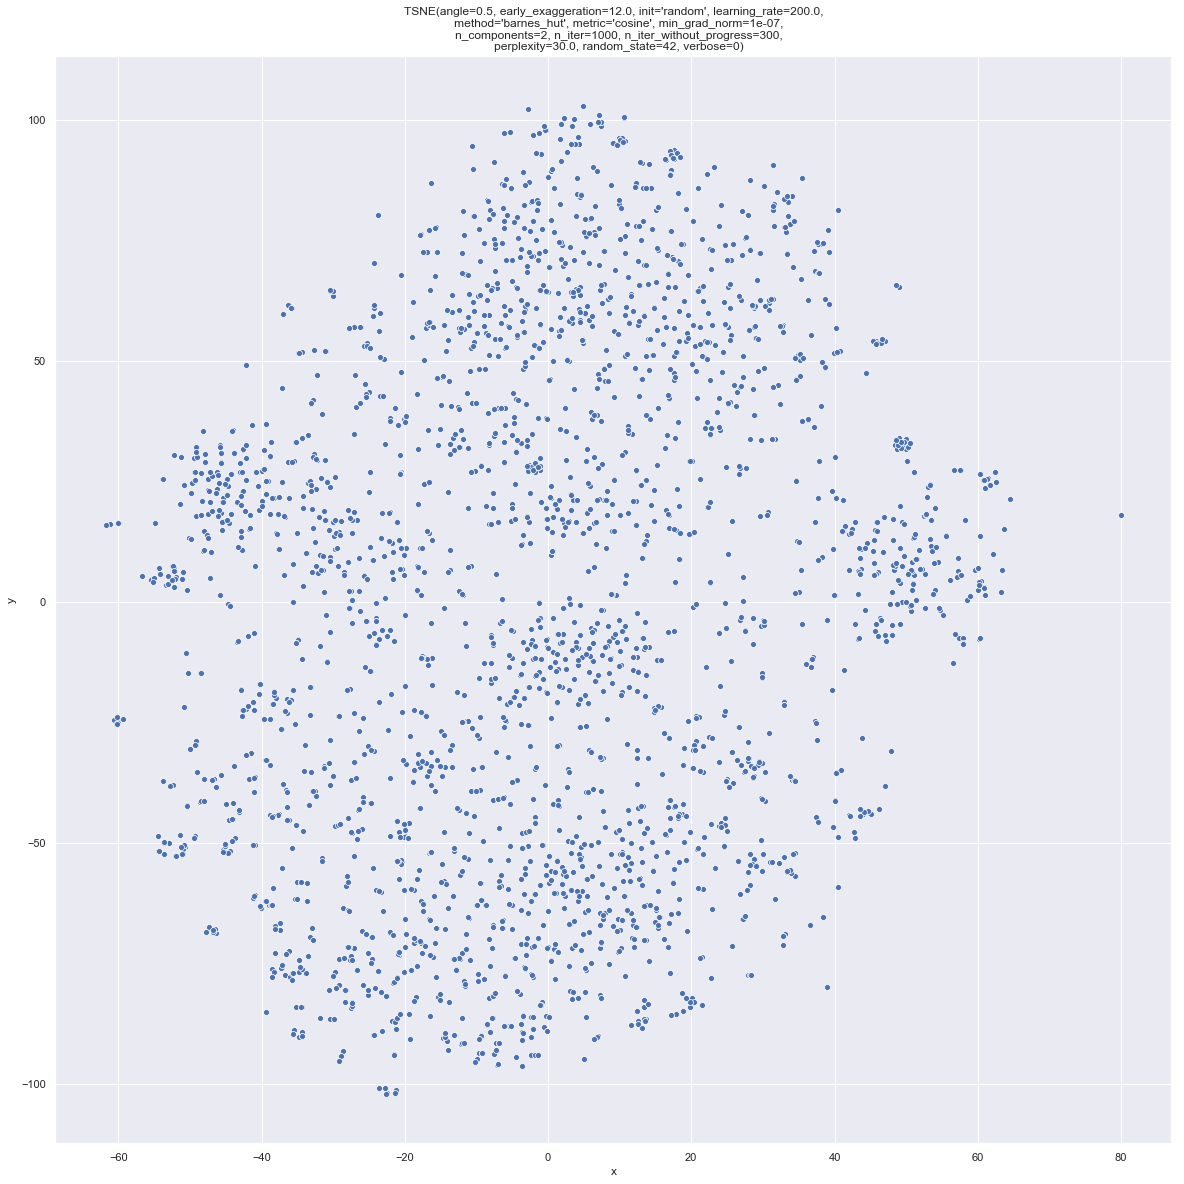

In [12]:
ev300.plot_embeddings(detailed=False, label=False)

In [13]:
coords = pd.DataFrame.from_records(tsne300.embedding_, columns=['x', 'y'], index=seed.index)

result = seed.merge(coords, left_index=True, right_index=True)
result.head()

,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,tokens,year,month,day,ipc_classes,first_letters,three_letters,four_letters,before_slash,references,referenced_by,raw_assignees,assignees,terms,x,y
0,4104187,US-4104187-A,US,24713901,19760412,Composition and method treating soft contact lenses at e...,Method and compositions are provided for elevated temper...,What is claimed is: \n \n 1. A soft lens therm...,"[composition, treating, soft, contact, lenses, elevated,...",1976,4,12,"[A61L12/14, C11D1/52, C11D1/66, C11D1/90, C11D10/02, C11...","[A, C, G]","[A61, C11, G02]","[A61L, C11D, G02C]","[A61L12, C11D1, C11D10, C11D17, C11D3, G02C13, G02C7]","[US-3171752-A, US-4013576-A, US-2089212-A, US-3888782-A,...","[US-4259202-A, US-2006241001-A1, US-4533399-A, US-467869...",[BARNES HIND PHARM INC],[BARNES HIND INC],"[physiologically acceptable, disinfecting cleaning, phys...",1.360024,-13.795673
1,6000534,US-6000534-A,US,24806490,19960816,Contact lens disinfecting device and disinfection system,The present invention provides a device for disinfecting...,I claim: \n \n 1. A device for disinfecting an...,"[contact, lens, disinfecting, device, disinfection, syst...",1996,8,16,"[A45C11/00, A61L12/12, A61L2/18, G02C13/00]","[A, G]","[A45, A61, G02]","[A45C, A61L, G02C]","[A45C11, A61L12, A61L2, G02C13]","[US-4750610-A, US-4889693-A, US-5143104-A, US-5353949-A,...",[],[ALLERGAN SALES INC],[ADVANCED CORNEAL SYSTEMS INC],"[lens holding, cap, internal surface, container cap, int...",-45.262512,16.857796
2,7281794,US-7281794-B2,US,25536666,20011116,Disposable ophthalmic lens,"An ophthalmic lens with high definition, wide field of v...",What is claimed and desired to be secured by Letters Pat...,"[disposable, ophthalmic, lens, ophthalmic, lens, high, d...",2001,11,16,"[A61B3/125, G02C7/04]","[A, G]","[A61, G02]","[A61B, G02C]","[A61B3, G02C7]","[US-6471396-B2, US-4921205-A, US-4613379-A, US-5706073-A...",[],[HEACOCK GREGORY L],[HEACOCK GREGORY L],"[image lens, lens image, holder, lens mounted, lens inte...",-4.929601,43.415123
3,8693104,US-8693104-B2,US,44651943,20100824,Lens with compound linear-convex meniscus wall,The present invention relates generally to an arcuate li...,The invention claimed is: \n \n 1. An optical ...,"[lens, compound, linear, convex, meniscus, wall, arcuate...",2010,8,24,"[G02B1/06, G02B3/12]",[G],[G02],[G02B],"[G02B1, G02B3]","[WO-2008062067-A1, US-7724444-B2, US-7311398-B2, WO-2004...",[],"[KERNICK EDWARD R, RIALL JAMES DANIEL, JOHNSON & JOHNSON...","[SNOOK SHARIKA, RIALL JAMES D, PUGH RANDALL B, OTTS DANI...","[curve lens, meniscus, optical lens, electrical charge, ...",48.435062,32.470863
4,8215770,US-8215770-B2,US,40337739,20070223,Ophthalmic dynamic aperture,Embodiments of the present invention relate to an electr...,"1. An ophthalmic device, comprising:\n an electro-active...","[ophthalmic, dynamic, aperture, embodiments, electro, ac...",2007,2,23,"[A61F2/16, G02C7/04]","[A, G]","[A61, G02]","[A61F, G02C]","[A61F2, G02C7]","[US-6956682-B2, US-5608567-A, US-5963300-A, US-4904063-A...","[US-9535263-B2, US-9201250-B2, US-10203522-B2, US-954177...","[HADDOCK JOSHUA N, VAN HEUGTEN ANTHONY, KOKONASKI WILLIA...","[VAN HEUGTEN ANTHONY, HUNKELER JOHN, E A OPHTHALMICS, KO...","[electro active, electro, aperture, ophthalmic device, e...",12.907031,24.283867


In [14]:
with open(src_dir + "/data/" + seed_name + "/baseline/tsne.pkl", 'wb') as outfile:
    pickle.dump(result, outfile, protocol=pickle.HIGHEST_PROTOCOL)

MemoryError: 

In [15]:
result.drop(columns=["tokens"], inplace=True)
result["terms"] = result["terms"].apply(lambda x: x[:15])
result.head()

,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,year,month,day,ipc_classes,first_letters,three_letters,four_letters,before_slash,references,referenced_by,raw_assignees,assignees,terms,x,y
0,4104187,US-4104187-A,US,24713901,19760412,Composition and method treating soft contact lenses at e...,Method and compositions are provided for elevated temper...,What is claimed is: \n \n 1. A soft lens therm...,1976,4,12,"[A61L12/14, C11D1/52, C11D1/66, C11D1/90, C11D10/02, C11...","[A, C, G]","[A61, C11, G02]","[A61L, C11D, G02C]","[A61L12, C11D1, C11D10, C11D17, C11D3, G02C13, G02C7]","[US-3171752-A, US-4013576-A, US-2089212-A, US-3888782-A,...","[US-4259202-A, US-2006241001-A1, US-4533399-A, US-467869...",[BARNES HIND PHARM INC],[BARNES HIND INC],"[physiologically acceptable, disinfecting cleaning, phys...",1.360024,-13.795673
1,6000534,US-6000534-A,US,24806490,19960816,Contact lens disinfecting device and disinfection system,The present invention provides a device for disinfecting...,I claim: \n \n 1. A device for disinfecting an...,1996,8,16,"[A45C11/00, A61L12/12, A61L2/18, G02C13/00]","[A, G]","[A45, A61, G02]","[A45C, A61L, G02C]","[A45C11, A61L12, A61L2, G02C13]","[US-4750610-A, US-4889693-A, US-5143104-A, US-5353949-A,...",[],[ALLERGAN SALES INC],[ADVANCED CORNEAL SYSTEMS INC],"[lens holding, cap, internal surface, container cap, int...",-45.262512,16.857796
2,7281794,US-7281794-B2,US,25536666,20011116,Disposable ophthalmic lens,"An ophthalmic lens with high definition, wide field of v...",What is claimed and desired to be secured by Letters Pat...,2001,11,16,"[A61B3/125, G02C7/04]","[A, G]","[A61, G02]","[A61B, G02C]","[A61B3, G02C7]","[US-6471396-B2, US-4921205-A, US-4613379-A, US-5706073-A...",[],[HEACOCK GREGORY L],[HEACOCK GREGORY L],"[image lens, lens image, holder, lens mounted, lens inte...",-4.929601,43.415123
3,8693104,US-8693104-B2,US,44651943,20100824,Lens with compound linear-convex meniscus wall,The present invention relates generally to an arcuate li...,The invention claimed is: \n \n 1. An optical ...,2010,8,24,"[G02B1/06, G02B3/12]",[G],[G02],[G02B],"[G02B1, G02B3]","[WO-2008062067-A1, US-7724444-B2, US-7311398-B2, WO-2004...",[],"[KERNICK EDWARD R, RIALL JAMES DANIEL, JOHNSON & JOHNSON...","[SNOOK SHARIKA, RIALL JAMES D, PUGH RANDALL B, OTTS DANI...","[curve lens, meniscus, optical lens, electrical charge, ...",48.435062,32.470863
4,8215770,US-8215770-B2,US,40337739,20070223,Ophthalmic dynamic aperture,Embodiments of the present invention relate to an electr...,"1. An ophthalmic device, comprising:\n an electro-active...",2007,2,23,"[A61F2/16, G02C7/04]","[A, G]","[A61, G02]","[A61F, G02C]","[A61F2, G02C7]","[US-6956682-B2, US-5608567-A, US-5963300-A, US-4904063-A...","[US-9535263-B2, US-9201250-B2, US-10203522-B2, US-954177...","[HADDOCK JOSHUA N, VAN HEUGTEN ANTHONY, KOKONASKI WILLIA...","[VAN HEUGTEN ANTHONY, HUNKELER JOHN, E A OPHTHALMICS, KO...","[electro active, electro, aperture, ophthalmic device, e...",12.907031,24.283867


In [16]:
result.to_json('../demo/data/baseline/' + seed_name + '.json', orient="records")